## Data Set 2: Predicting Risk of Developing Diabetes

***
### Introduction:
***

Diabetes is a chronic disease where the body develops a resistance the insulin hormone responsible for converting food into glucose. The data set here consists of 182 data points collected from medical records of Pima Indians. This set contains data about each individual's health such as:
* Number of times pregnant
* Glucose levels
* Diastolic blood pressure
* Skinfold thickness
* Insulin levels
* Bmi
* Age
* Diabetic/non-diabetic
* Scored probability of risk for diabetes

This analysis seeks to find the relationship between the independent factors(pregnant, glucose, insulin, etc) and the dependent variable(scored probability)


**Research Question:**

The main purpose of this analysis is to search for a correlation between different health factors and their impact on an individual's risk for diabetes.

**Variables:**

The independent variables are:
* Number of times pregnant(pregnant)
* Glucose
* Diastolic blood pressure(diastolic)
* Skinfold thickness(skinfold)
* Insulin
* Bmi
* Pedigree function of diabetes(pedigree)
* Age

The dependent variable will be the scored probability of risk for an individual to develop diabetes.

**Procedures:**

The analysis will follow these main steps:
- **Step 1**: Load data
- **Step 2**: Perform Exploratory Data Analysis
- **Step 3**: Conclusion

>Our EDA is broken down into these steps:
- Understand variables
- Clean dataset
- Analyze relationships between variables

***

In [35]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

***
### Step 1: Load data into the data frame from GitHub

`.head()` returns the first 5 rows of the dataset. 

`.tail()` returns the last 5 rows of the dataset.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day4/Day4%20Data.csv")

# To display the top 5 rows
data.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [ ]:
# To display the bottom 5 rows
data.tail() 

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468
180,0,102,86,17,105,29.3,0.695,27,0,0,0.119981


***
### Step 2: Exploratory Data Analysis

In this case, the procedures of Exploratory Data Analysis consist of:
1. Description of data
2. Check the data types
3. Check the missing or null values
4. Check distribution
5. Resolve errors
6. Analyze relationships between variables


#### 1. Description of data:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (9568, 5), meaning the dataset has 9568 rows and 5 columns.

`.columns` returns the name of all of the columns in the dataset.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

In [ ]:
# dataset size:
data.shape

(181, 11)

In [ ]:
# displaying column names:
data.columns

Index(['pregnant', 'glucose', 'diastolic', 'skinfold', 'insulin', 'bmi',
       'pedigree', 'age', 'class', 'scored.class', 'scored.probability'],
      dtype='object')

In [ ]:
# statistical summary of numeric values
data.describe()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,3.861878,118.303867,71.701657,19.801105,63.767956,31.577901,0.449641,33.314917,0.314917,0.176796,0.303726
std,3.236551,30.484084,11.802987,15.692326,88.734756,6.659935,0.284006,11.183582,0.465771,0.382554,0.231235
min,0.000000,57.000000,38.000000,0.000000,0.000000,19.400000,0.085000,21.000000,0.000000,0.000000,0.023228
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.300000,0.257000,24.000000,0.000000,0.000000,0.117024
50%,3.000000,112.000000,70.000000,22.000000,0.000000,31.600000,0.391000,30.000000,0.000000,0.000000,0.239994
75%,6.000000,136.000000,78.000000,32.000000,105.000000,36.000000,0.580000,41.000000,1.000000,0.000000,0.430926
max,15.000000,197.000000,104.000000,54.000000,543.000000,50.000000,2.288000,67.000000,1.000000,1.000000,0.946334


In [ ]:
# checking data types
data.dtypes

pregnant                int64
glucose                 int64
diastolic               int64
skinfold                int64
insulin                 int64
bmi                   float64
pedigree              float64
age                     int64
class                   int64
scored.class            int64
scored.probability    float64
dtype: object

The data here is already in integer format

### 3. Checking for empty or null data

In [ ]:
# finding any null values
print(data.isnull().sum())

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64


No null or empty values in this data set

### 4. Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95373bc668>,
      dtype=object)

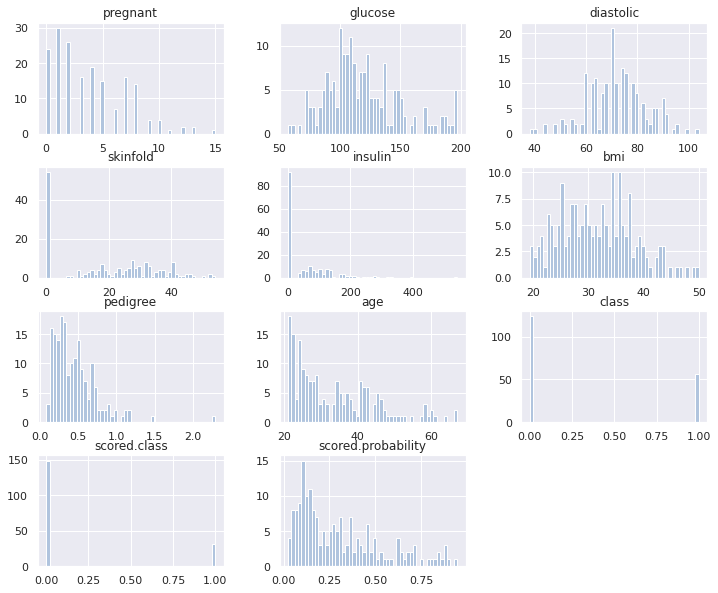

In [ ]:
data.hist(bins=50, color='lightsteelblue', figsize=(12,10))

There are some irregularities in the data. Some records of skinfold thickness and insulin levels are 0, which cannot feasibly be the case for a living person. Since the data set is rather small, instead of deleting the data containing 0 for insulin and skinfold, we will replace these values with the median. To do this, first we classify the variables based on outcome(diabetic vs non-diabetic)

Other observations show diastolic having normal distribution, with glucose and bmi being slightly skewed-right.

### 5. Resolve errors

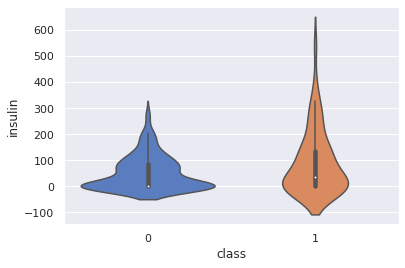

In [ ]:
# classifying insulin based on class
ax = sns.violinplot(x='class', y='insulin', data=data, palette='muted', split=True)

It is implied from this violin plot that individuals with diabetics seem to have higher insulin levels than those without. This is inferred from the box plot inside the violin for 1(diabetic) being slightly further away from the horizontal axis than the box plot for 0(non-diabetic)

In [ ]:
# replacing zero-values for insulin
df1 = data.loc[data['class'] == 1]
df2 = data.loc[data['class'] == 0]

df1 = df1.replace({'insulin':0}, np.median(df1['insulin']))
df2 = df2.replace({'insulin':0}, np.median(df2['insulin']))

newData = [df1, df2]
data = pd.concat(newData)

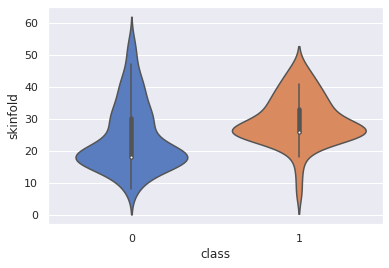

In [ ]:
# classifying skinfold based on class
ax = sns.violinplot(x='class', y='skinfold', data=data, palette='muted', split=True)

We see the same implication from the first violin plot in this one. It seems as though individuals with diabetes have higher skinfold thickness.

In [ ]:
# replacing zero-values for skinfold
df3 = data.loc[data['class'] == 1]
df4 = data.loc[data['class'] == 0]

df3 = df3.replace({'skinfold':0}, np.median(df1['skinfold']))
df4 = df4.replace({'skinfold':0}, np.median(df2['skinfold']))

newData = [df3, df4]
data = pd.concat(newData)

### 6. Analyze relationships between variables

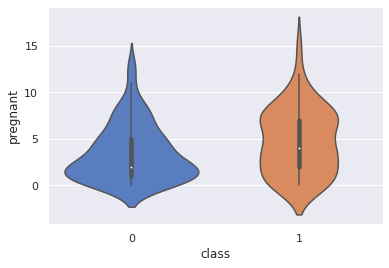

In [37]:
# classifying pregnant based on class
ax = sns.violinplot(x='class', y='pregnant', data=data, palette='muted', split=True)

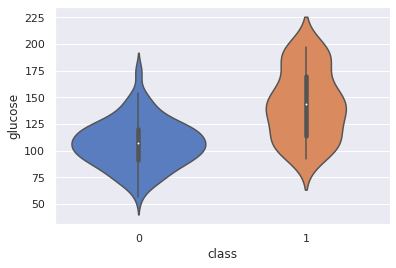

In [38]:
# classifying glucose based on class
ax = sns.violinplot(x='class', y='glucose', data=data, palette='muted', split=True)

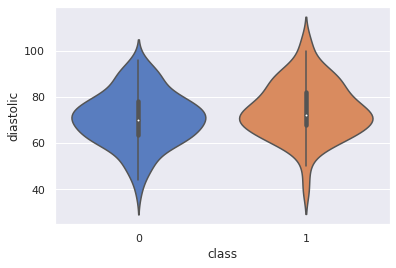

In [39]:
# classifying diastolic based on class
ax = sns.violinplot(x='class', y='diastolic', data=data, palette='muted', split=True)

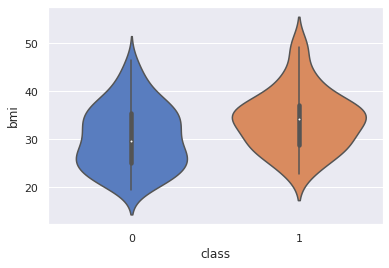

In [40]:
# classifying bmi based on class
ax = sns.violinplot(x='class', y='bmi', data=data, palette='muted', split=True)

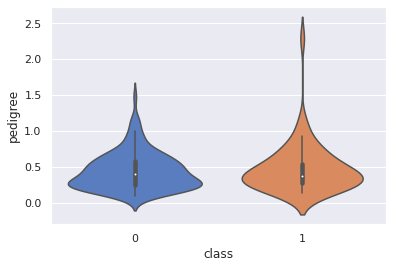

In [41]:
# classifying pedigree based on class
ax = sns.violinplot(x='class', y='pedigree', data=data, palette='muted', split=True)

A few variables, particularly glucose, stick out after observations of these violin plots. For glucose specifically, we see a significant vertical distance between the box plot for diabetics vs non-diabetics. To a lesser degree, the same effect is seen in the diastolic and pregnant factors. Like the violin plots for insulin and skinfold--the box plots within the violins for glucose, pregnant, and diastolic also lean further away from the horizontal axis for diabetics than for non-diabetics. From these observations, glucose seems to be an important independent factor to look out for.

Text(0.5, 1.0, 'Figure 6a: Correlations')

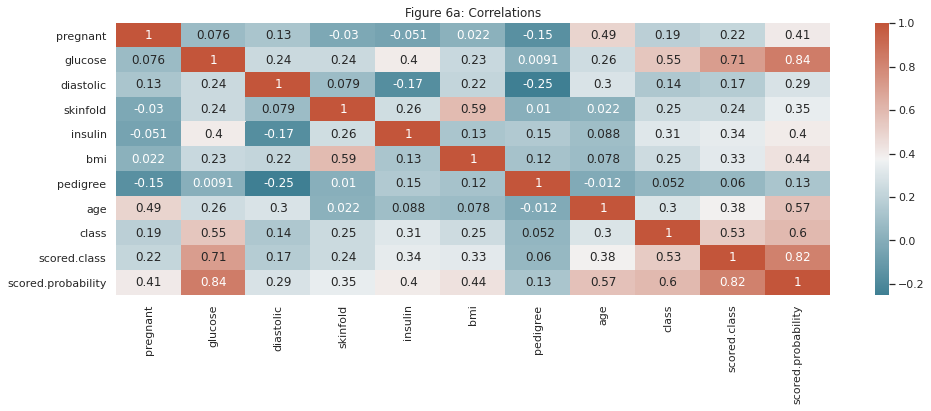

In [57]:
corr = data.corr()# plot the heatmap
plt.figure(figsize = (16,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6a: Correlations')

The heatmap above suggests a strong positive correlation between glucose and scored.probability. 

We use `sns.regplot` to display relationships between the independent variables and the dependent variable.

We use seaborn to calculate and plot a linear regression model fit along a 95% confidence interval band.

Text(0.5, 1.0, 'Figure 7.7: pedigree vs scored probability')

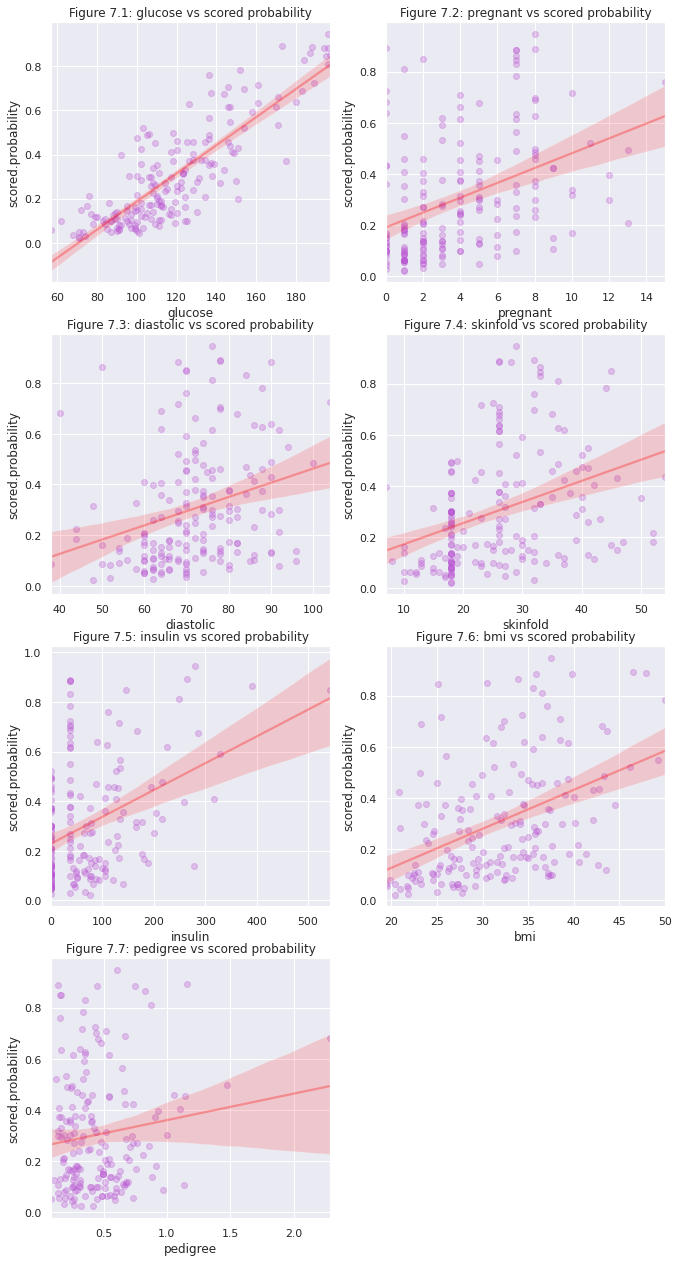

In [71]:
plt.figure(figsize=(11,22))

# Plot a relationship between two variables
plt.subplot(421)
sns.regplot(x="glucose", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.1: glucose vs scored probability')

plt.subplot(422)
sns.regplot(x="pregnant", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.2: pregnant vs scored probability')

plt.subplot(423)
sns.regplot(x="diastolic", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.3: diastolic vs scored probability')

plt.subplot(424)
sns.regplot(x="skinfold", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.4: skinfold vs scored probability')

plt.subplot(425)
sns.regplot(x="insulin", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.5: insulin vs scored probability')

plt.subplot(426)
sns.regplot(x="bmi", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.6: bmi vs scored probability')

plt.subplot(427)
sns.regplot(x="pedigree", y="scored.probability",data=data, scatter_kws = {'color': 'mediumorchid', 'alpha': 0.3}, line_kws = {'color': 'red','alpha': 0.3})
plt.title('Figure 7.7: pedigree vs scored probability')

***
### Conclusion

Based on the results from our charts, it seems that of the independent variables in the data set, glucose is the most important one to further test. While the other independent variables maintain a positive correlation with scored probability, glucose holds the highest--evidence by the regplot and heatmap. 

For the future, we may scale the data accordingly to be used in testing models. Utilizing models and testing/training data can yield the ability to predict, to a certain degree of confidence, whether or not an individual is at risk for developing diabetes.